# Data preprocessing
This notebook contains preprocessing phase and train/val/test split.
Then notebook upload the original Covid dataset and stores the standardized and randomized one.

# Modules loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import os
import pickle
import torch
import time
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline
np.random.seed(4)

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Human_Data/Lung_Disease_Prediction/Dataset1/Dataset2'

# Data Loading and Preprocessing
(25 minutes required circa)

# Data visualization

Original image shape: (397, 474, 3) and range in [0, 255]
Standardized image shape: (480, 480, 3) and range in [0, 1.0]


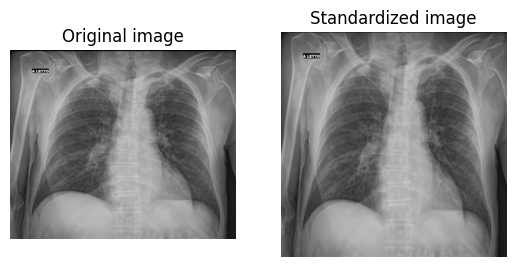

In [ ]:
directory = str(path+'/covid')
img =  cv2.imread(os.path.join(directory, "RX-torace-a-letto-del-paziente-in-unica-proiezione-AP-1-1.jpeg"))
img_std = np.array(tf.image.resize(img, [480, 480])/255)

print(f"Original image shape: {img.shape} and range in [{img.min()}, {img.max()}]")
print(f"Standardized image shape: {img_std.shape} and range in [{int(img_std.min())}, {np.round(img_std.max(),0)}]")

fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original image')
axs[0].axis('off')

axs[1].imshow(img_std)
axs[1].set_title('Standardized image')
axs[1].axis('off')

plt.show()

# Loading Dataset


In [ ]:
def load_image(filepath):
    img = cv2.imread(filepath)
    img_std = tf.image.resize(img, [224,224])/255
    return img_std

def get_img(directory, set):
    print(f"Loading {set} dataset")
    X_img = []
    with ThreadPoolExecutor(max_workers=2) as executor:
        futures = []
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            futures.append(executor.submit(load_image, filepath))

        for future in futures:
            img_std = future.result()
            X_img.append(img_std)

    print(f"{set} set uploaded.")
    return np.array(X_img)

X_cv = get_img(str(path)+"/covid", "covid")
X_pn = get_img(str(path)+"/pneumonia", "pneumonia")
X_nm = get_img(str(path)+"/normal", "normal")

Loading covid dataset
covid set uploaded.
Loading pneumonia dataset
pneumonia set uploaded.


In [ ]:
print(X_cv.shape)
print(X_nm.shape)
print(X_pn.shape)

In [ ]:
img = np.concatenate((X_pn, X_cv, X_nm))
labels = np.concatenate((np.full(len(X_pn), 2),
                             np.full(len(X_cv), 1),
                             np.full(len(X_nm), 0)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img, labels, test_size=0.25, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Human_Data/Lung_Disease_Prediction/Dataset_New'


# Training
np.save(os.path.join(str(path+'/Train/images'), 'X_train.npy'), X_train)
with open(os.path.join(str(path+'/Train'), 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train, f)

# Validation
np.save(os.path.join(str(path+'/Val/images'), 'X_val.npy'), X_val)
with open(os.path.join(str(path+'/Val'), 'y_val.pkl'), 'wb') as f:
    pickle.dump(y_val, f)

# Test
np.save(os.path.join(str(path+'/Test/images'), 'X_test.npy'), X_test)
with open(os.path.join(str(path+'/Test'), 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)